In [113]:

%load_ext autoreload
%autoreload 2

from jordan_wigner import jw_majoranas
from qiskit.quantum_info import PauliList
from tableau import spread_node, spread_node_slice, anticommutation_matrix
from electronic_hamiltonian import quadratic_terms
from cost_functions import quadratic_term_mean_weight, compute_cost_pauliString_circuitCoupling
from annealing import anneal, anneal1
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
N = 10

x, z = jw_majoranas(N)

x_1, z_1 = quadratic_terms(x, z, N)
print(x_1[0])
print(z_1[0])
print(x_1.shape)
# print(x_1)
# print(z)

paulis = PauliList.from_symplectic(z_1, x_1)

print(paulis)
# print(f"Average Weight: {average_weight(x, z)}")
# compute_cost_pauliString_circuitCoupling(x_1, z_1)
# print(f"Average Weight: {compute_cost_pauliString_circuitCoupling(x, z)}")

[ True  True False False False False False False False False]
[ True False False False False False False False False False]
(45, 10)
['IIIIIIIIXY', 'IIIIIIIXZY', 'IIIIIIXZZY', 'IIIIIXZZZY', 'IIIIXZZZZY',
 'IIIXZZZZZY', 'IIXZZZZZZY', 'IXZZZZZZZY', 'XZZZZZZZZY', 'IIIIIIIXYI',
 'IIIIIIXZYI', 'IIIIIXZZYI', 'IIIIXZZZYI', 'IIIXZZZZYI', 'IIXZZZZZYI',
 'IXZZZZZZYI', 'XZZZZZZZYI', 'IIIIIIXYII', 'IIIIIXZYII', 'IIIIXZZYII',
 'IIIXZZZYII', 'IIXZZZZYII', 'IXZZZZZYII', 'XZZZZZZYII', 'IIIIIXYIII',
 'IIIIXZYIII', 'IIIXZZYIII', 'IIXZZZYIII', 'IXZZZZYIII', 'XZZZZZYIII',
 'IIIIXYIIII', 'IIIXZYIIII', 'IIXZZYIIII', 'IXZZZYIIII', 'XZZZZYIIII',
 'IIIXYIIIII', 'IIXZYIIIII', 'IXZZYIIIII', 'XZZZYIIIII', 'IIXYIIIIII',
 'IXZYIIIIII', 'XZZYIIIIII', 'IXYIIIIIII', 'XZYIIIIIII', 'XYIIIIIIII']


T0 = 45
Iteration 0 908
Iteration 49 839
Iteration 112 810
Iteration 358 779
Iteration 535 773
Iteration 652 761
Iteration 810 733
Iteration 1630 645
Iteration 9072 641
Iteration 9592 555
['IIIIIXZYII', 'IXZZZZZYII', 'IIIIIXZYXY', 'IXZZYXZYII', 'IIIIIXYXZY',
 'IIIIIIIXZY', 'IIIIXYIXZY', 'IIIXZYIXZY', 'IIXZZYIXZY', 'IXZZZYIXZY',
 'XZZZZYIXZY', 'IIIXZZZYII', 'IIIXZYXYII', 'IIIIIIIXYI', 'XZZZZYIXYI',
 'IIXZZYIIII', 'IIXZZZZYII', 'IXZZZYIXYI', 'IIIIXYXYII', 'IIIIXZZYII',
 'IIIIIIXYII', 'IIIIIXZZYI', 'XYIIIXZYII', 'IIXZZYXYII', 'IIIIIXZZZY',
 'IIIXZYIXYI', 'IIIIIXYIII', 'IIIIIXYXYI', 'IXZZZYXYII', 'IXZZZYIIII',
 'XZZZZYIIII', 'XZZZZYXYII', 'IIIIXYIIII', 'IIIXZYIIII', 'IIXZZYIXYI',
 'IIXZYXZYII', 'XZZZZZZYII', 'XZYIIXZYII', 'IIIIXYIXYI', 'IIIXYXZYII',
 'XZZZYXZYII', 'IIXYIXZYII', 'IXZYIXZYII', 'XZZYIXZYII', 'IXYIIXZYII']


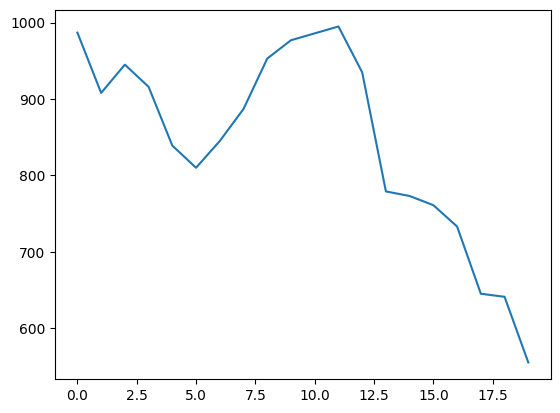

In [168]:

# x_1, z_1, energies, energy_opt = anneal(x_1, z_1, explore=spread_node, energy=quadratic_term_mean_weight, cooling_rate=0.9995)
x_1, z_1, energies, energy_opt = anneal(x_1, z_1, explore=spread_node, energy=compute_cost_pauliString_circuitCoupling, cooling_rate=0.9995)
# x_1, z_1, energies, energy_opt = anneal(x_1, z_1, explore=spread_node, energy=compute_cost_pauliString_circuitCoupling)


paulis = PauliList.from_symplectic(z_1, x_1)

print(paulis)

plt.plot(energies)


In [9]:
anticommutation_matrix(x, z)

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,